![](All_About_Iris_Louisiana_Iris_Sinfonietta.jpg)

# Name: Swati

# Task 3 - Prediction using Unsupervised ML

## To Predict optimum clusters for IRIS Dataset

<img src = 'All_About_Iris_Louisiana_Iris_Sinfonietta.jpg'></img>

### Importing required libraries

In [94]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
import seaborn as sns

### Importing dataset

In [95]:
data=pd.read_csv('Iris.csv')

In [96]:
# Printing dataset 
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


#### To display first 10 rows and columns

In [97]:
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


#### To check the overview of our dataset, we use info function

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [99]:
# To check number of rows and columns, we use 'shape'
data.shape

(150, 6)

In [100]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


#### To check missing values

In [101]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Data plotting

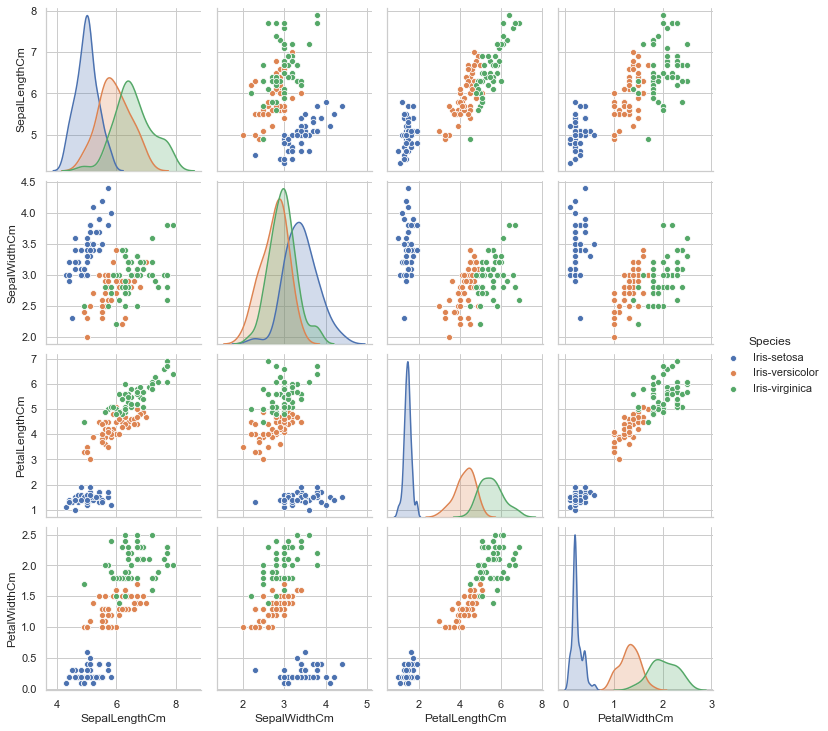

In [102]:
sns.pairplot(data.iloc[:,[1,2,3,4,5]],hue='Species')

### Heatmap for correlation plot

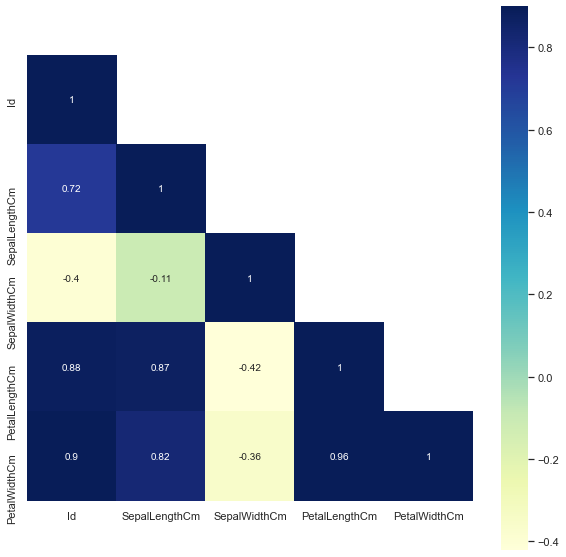

In [103]:
cor=data.corr()
mask=np.array(cor)
mask[np.tril_indices_from(mask)]=False
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cor,mask=mask,vmax=0.9,square=True,annot=True,cmap="YlGnBu")

## Elbow Method
### Predicting the the optimum number of clusters

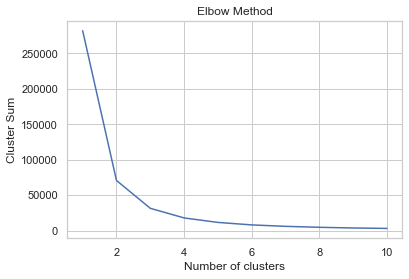

In [104]:
x=data.iloc[:,[0,1,2,3]].values
from sklearn.cluster import KMeans
arr=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    km.fit(x)
    arr.append(km.inertia_)
    
    
# Plotting the result

plt.plot(range(1,11),arr)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster Sum') 
plt.show()

#### K means classifier creation

In [105]:
km=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=4,random_state=21)
y_km=km.fit_predict(x)

### Visualising the clusters

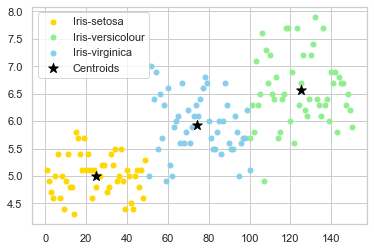

In [106]:
plt.scatter(x[y_km==0,0],x[y_km==0,1],s=100,color='gold',label='Iris-setosa',marker='.')
plt.scatter(x[y_km==1,0],x[y_km==1,1],s=100,color='lightgreen',label='Iris-versicolour',marker='.')
plt.scatter(x[y_kmeans==2,0],x[y_km==2,1],s=100,color='skyblue',label='Iris-virginica',marker='.')

# Centroid Plotting
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=100,color='black',label='Centroids',marker='*')
plt.legend()

## Result 

### After considering the values of K, we can conclude from above visualisations that, 3 is the optimum value of K in this Iris dataset.
### Therefore, the optimum number of clusters of  different flower species according to the 'iris' dataset with their centroids were predicted using K-Means Clustering and were represented visually.
